# Exercício 1

Precisamos colocar um campo retangular com uma cerca. Temos 500 metros de cerca
e um edifício está em um lado do campo e por isso não precisa de nenhuma cerca neste lado.
Determine as dimensões do campo que vai envolver a maior área.


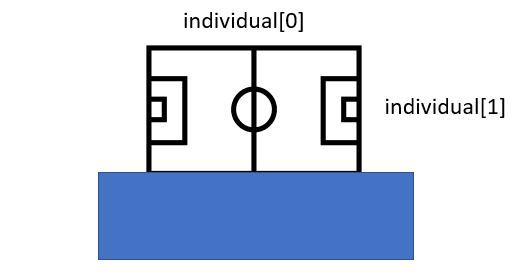


## Instalar pacote DEAP

In [1]:
!pip install deap

     |████████████████████████████████| 163kB 4.5MB/s 


# Importar bibliotecas necessárias

In [2]:
import matplotlib.pyplot as plt
from deap import base, creator, tools
import pandas as pd
import operator
import random
import numpy
import math

# Função objetivo

   - Função objetivo com objetivo de maximizar a area

In [3]:
def objective_function(individual):
    custo = individual[0] * individual[1]
    return custo,

# Restrição do problema


   - Verificar partícula - restrições impostas as partículas
       - Há uma restrição do tamanho do perímetro <= 500 

In [4]:
def feasible(individual):
  if individual[0] + 2*individual[1] > 500:
    return False
  return True

## Criando a função de Minimização e a estrutura da partícula

In [5]:
#  função objetivo: nome, tipo(f.o.), o peso deve ser 1.0 para esse caso (função de maximização)
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Particle", list, fitness=creator.FitnessMax, speed=list, smin=None, smax=None, best=None) # smin e smax são limites de speed. best é a melhor até o momento.

## Definindo uma função para gerar a partícula

In [6]:
# Função que cria uma partícula inicializando os atributos aleatoriamente.
# size é o número de variáveis de decisão, pmin e pmax são os limites das variáveis, smin e smax são os limites de velocidade
def generate(size, pmin, pmax, smin, smax):
    part = creator.Particle(random.uniform(pmin, pmax) for _ in range(size)) 
    part.speed = [random.uniform(smin, smax) for _ in range(size)]
    part.smin = smin
    part.smax = smax
    return part

## Definindo a função para atualização da partícula 

In [7]:
# Esta função calcula a velocidade, os limites de veloicidade e a nova posição da partícula
# phi1 = fator cognitivo e phi2 = fator social
def updateParticle(part, best, phi1, phi2):
    u1 = (random.uniform(0, phi1) for _ in range(len(part)))
    u2 = (random.uniform(0, phi2) for _ in range(len(part)))
    v_u1 = map(operator.mul, u1, map(operator.sub, part.best, part)) # indo em direção ao melhor conhecido pela partícula
    v_u2 = map(operator.mul, u2, map(operator.sub, best, part)) # indo em direção ao melhor da vizinhaça
    part.speed = list(map(operator.add, part.speed, map(operator.add, v_u1, v_u2)))
    for i, speed in enumerate(part.speed):
        if abs(speed) < part.smin:
            part.speed[i] = math.copysign(part.smin, speed)
        elif abs(speed) > part.smax:
            part.speed[i] = math.copysign(part.smax, speed)
    part[:] = list(map(operator.add, part, part.speed))

## Criando o toolbox

In [20]:
toolbox = base.Toolbox()

# Função para gerar a partícula com valores 
toolbox.register("particle", generate, size=2, pmin=0, pmax=500, smin=-3, smax=3)

# Adicionando a função para gerar a população
toolbox.register("population", tools.initRepeat, list, toolbox.particle)

# Adicionando a função para atualizar a população
toolbox.register("update", updateParticle, phi1=2.0, phi2=2.0)

# Adicionando as funções para avaliar a população
toolbox.register("evaluate", objective_function)
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, -1000000))

## Definindo parêmetros para o PSO

   - **initial_population:** Número de inidivíduos da população inicial
   - **num_gen:** Número de iterações
   - **best:** Melhor partícula

In [21]:
initial_population = 100    
num_ite = 1000
best = None

### Criando a população inicial

In [22]:
# inicializando a população
pop = toolbox.population(n=initial_population)

### Estatísticas de avaliação (a cada geração)

   - Função objetivo
   - Média
   - Desvio padrão
   - Mínimo
   - Máximo

In [23]:
# estatísticas
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

### Definindo um log para avaliar as partículas ao longo das iterações

In [24]:
logbook = tools.Logbook()
logbook.header = ["gen", "evals"] + stats.fields

## Otimização

In [25]:
# Roda a otimização
for iteration in range(num_ite):
    for part in pop:
        part.fitness.values = toolbox.evaluate(part)
        # atualiza melhor da partícula
        if not part.best or part.best.fitness < part.fitness:
            part.best = creator.Particle(part)
            part.best.fitness.values = part.fitness.values
        # atualiza melhor global
        if not best or best.fitness < part.fitness:
            best = creator.Particle(part)
            best.fitness.values = part.fitness.values
    for part in pop:
        toolbox.update(part, best)

    # Salva todos os fitnesses em uma lista e imprime o status
    logbook.record(gen=iteration, evals=len(pop), **stats.compile(pop))
    print(logbook.stream)

gen	evals	avg    	std   	min   	max    
0  	100  	-696716	463294	-1e+06	27538.5
1  	100  	-696551	463547	-1e+06	28114.6
2  	100  	-696390	463794	-1e+06	28691  
3  	100  	-696226	464044	-1e+06	29267.6
4  	100  	-696053	464309	-1e+06	29844.5
5  	100  	-706186	459749	-1e+06	26987.9
6  	100  	-695722	464815	-1e+06	29954.7
7  	100  	-695564	465056	-1e+06	29487.9
8  	100  	-705685	460535	-1e+06	30105.6
9  	100  	-715829	455707	-1e+06	29555.6
10 	100  	-715675	455953	-1e+06	30105.6
11 	100  	-725821	450848	-1e+06	29487.8
12 	100  	-725686	451070	-1e+06	29824.2
13 	100  	-725543	451305	-1e+06	30328.9
14 	100  	-725418	451510	-1e+06	30815.5
15 	100  	-725308	451691	-1e+06	30105.2
16 	100  	-735491	446256	-1e+06	29219.2
17 	100  	-725074	452075	-1e+06	29183.4
18 	100  	-714653	457590	-1e+06	30240.1
19 	100  	-714517	457808	-1e+06	29596.8
20 	100  	-724684	452716	-1e+06	30421.6
21 	100  	-734863	447315	-1e+06	28540.8
22 	100  	-724461	453082	-1e+06	30657.3
23 	100  	-724344	453274	-1e+06	30238.7


## Melhor indivíduo

In [26]:
print('x: ', best[0])
print('y: ', best[1])
#print('Lentgh', 3*best[0])

x:  249.92857695322456
y:  125.03566524091347


## Avaliação do melhor indivíduo

In [27]:
objective_function(best)

(31249.985882061268,)

In [28]:
print('Area: ', best[0]*best[1])
print('2p_cerca: ', best[0] + 2*best[1])

Area:  31249.985882061268
2p_cerca:  499.9999074350515
